In [2]:
import jieba
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gettext(file_name):
    file = file_name + '.txt'
    #開啟檔案
    text = open(file,"r",encoding="utf-8").read()
    text = text.lower()
    #將特殊符號全部換成空格
    for ch in '!"#$%^&*()+_-,./:;<>?@[]{}\|~\'\"，？。！д':
        text = text.replace(ch,"")
    #計算行數
    line_counter = 0
    text_line = open(file,"r",encoding="utf-8")
    for line in text_line.readlines():
        line_counter += 1
    
    return text,line_counter

In [4]:
def Statistics_freq(words,counts,count_for_all):
    for word in words:
        #print(word)
        counts[word]=counts.get(word,0)+1
        count_for_all += 1
    
    return counts,count_for_all

In [5]:
def Delet_Fakeword(counts,count_for_all):
    #非字詞列表
    exc={"\t","\n"," "}
    for word in exc:
        count_for_all -= counts[word]
        del counts[word]
        
    return counts,count_for_all 

In [6]:
def SortandSave(data,num):
    items = list(data.items())
    #將列表按從大到小排序
    items.sort(key=lambda x:x[1],reverse=True)

    word = {}
    count = {}
    save_word = []
    save_count = []
    for i in range(num):
        word[i],count[i]=items[i]
        print((word[i],count[i]))
        save_word.append(word[i])
        save_count.append(count[i])
        
    return save_word,save_count

In [7]:
file_txt,line_counter = gettext("hw1-dataset")
words = jieba.lcut(file_txt)
need_num = 100
counts={}
count_for_all = 0
#統計每個單詞的出現次數
counts,count_for_all = Statistics_freq(words,counts,count_for_all)

#刪除非字詞
counts,count_for_all = Delet_Fakeword(counts,count_for_all)

print('counts_words:',count_for_all)
print('counts_lines:',line_counter)
    
TF = {}
for word in counts:
    TF[word] = counts[word] / count_for_all
    
IDF = {}
for word in counts:
    temp = line_counter / counts[word]
    IDF[word] = math.log(temp,10)

Weight = {}
for word in counts:
    Weight[word] = TF[word] * IDF[word]
    
print('---Counts---')
save_word,save_count = SortandSave(counts,need_num)
    
print('---TF---')
save_TFword,save_TF = SortandSave(TF,need_num)

print('---Weight---')
save_Wword,save_W = SortandSave(Weight,need_num)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\JenMing\AppData\Local\Temp\jieba.cache
Loading model cost 1.333 seconds.
Prefix dict has been built successfully.


counts_words: 6621014
counts_lines: 418202
---Counts---
('的', 317949)
('有', 202903)
('是', 100534)
('沒', 94100)
('嗎', 89831)
('八卦', 79119)
('了', 77365)
('都', 64092)
('你', 63247)
('人', 61121)
('在', 59470)
('什麼', 57848)
('我', 49489)
('就', 47847)
('好', 42708)
('要', 37243)
('不', 37113)
('說', 36724)
('去', 35665)
('台灣', 35505)
('會', 34494)
('跟', 33349)
('怎麼', 33176)
('為', 30818)
('很', 30343)
('被', 29492)
('啊', 28306)
('也', 24674)
('吃', 23967)
('可以', 23236)
('肥宅', 21686)
('是不是', 21560)
('到', 21059)
('想', 20715)
('看', 17239)
('來', 17203)
('真的', 16891)
('錢', 16163)
('後', 16070)
('吧', 15766)
('幹', 15319)
('他', 15144)
('比', 14433)
('知道', 14114)
('才', 13926)
('辦', 13914)
('自己', 13559)
('多', 13272)
('誰', 12947)
('不是', 11944)
('上', 11772)
('買', 11265)
('就是', 11021)
('阿', 10907)
('啦', 10894)
('最', 10806)
('不會', 10710)
('如果', 10690)
('現在', 10661)
('對', 10568)
('還是', 10558)
('一個', 10554)
('喔', 10494)
('把', 10362)
('該', 10333)
('中國', 10140)
('一堆', 10098)
('用', 9689)
('有人', 9680)
('這樣', 9665)
('做', 9554)


In [24]:
def Show_Bar(item_1,item_2,_type):
    plt.figure(_type,figsize=(20,10))
    plt.bar(item_1, height=item_2)
    plt.title('HW1#'+ str(_type))
    plt.xlabel('字詞編號')
    if _type == 1:
        plt.ylabel('權重')
    elif _type == 2:
        plt.ylabel('出現頻率')
    plt.show()

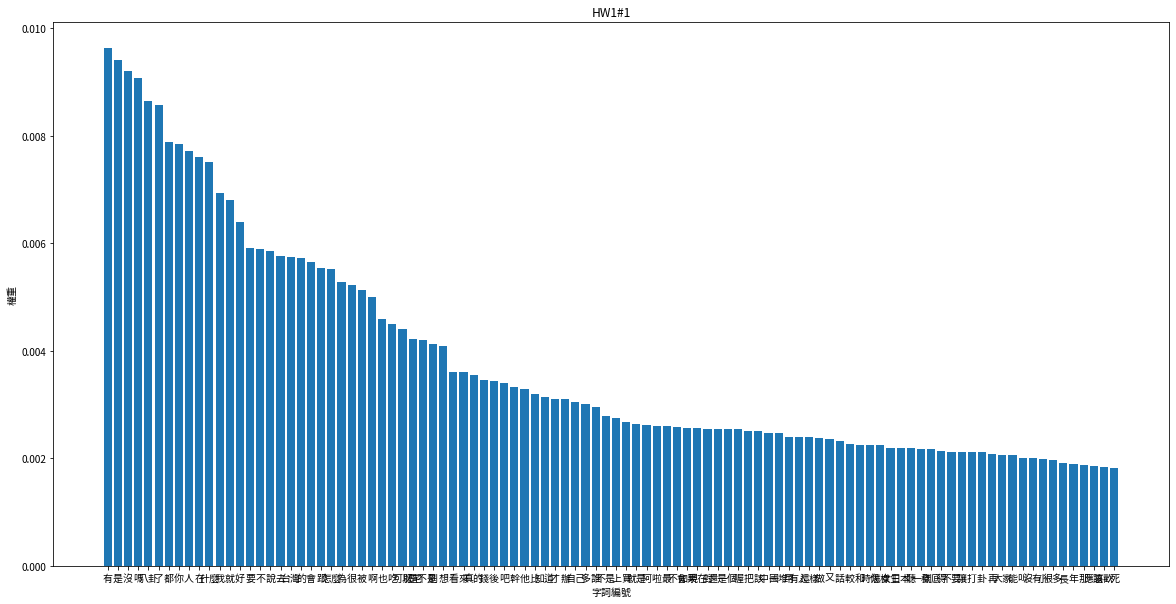

In [25]:
Show_Bar(save_Wword,save_W,1)

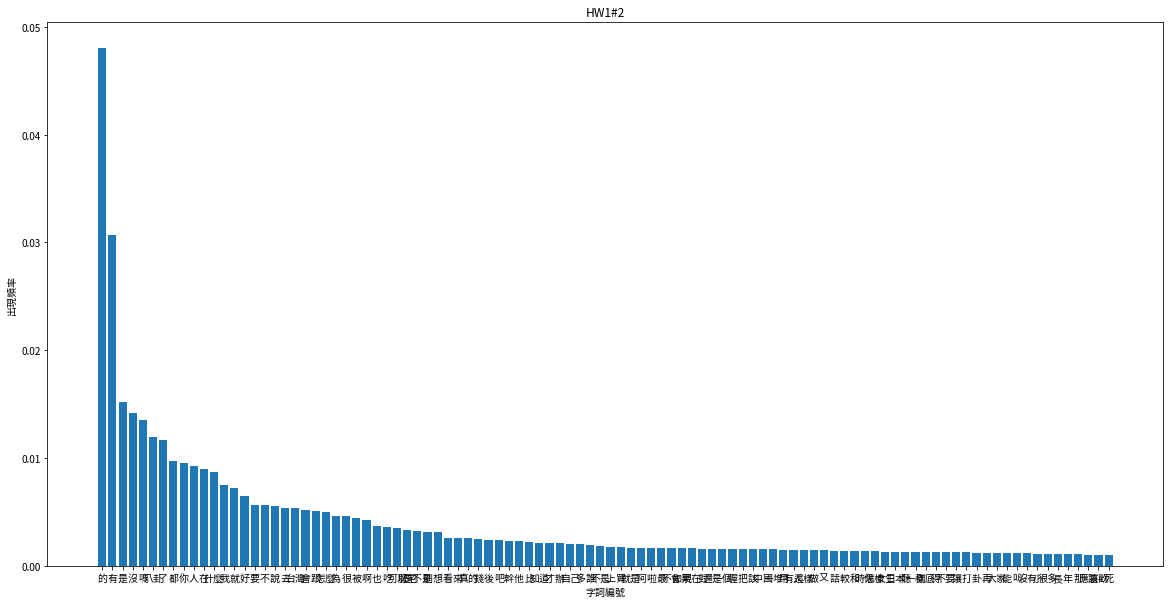

In [26]:
Show_Bar(save_TFword,save_TF,2)